Frequency Distribution
Rita Miller, Data Scientist
www.linkedin.com/in/
rita-m-135953239


In [1]:
#Save file in Google and then mount Google Drive account
#from google.colab import drive
#drive.mount('/content/drive')
#your Drive account will be mounted to the /content/drive directory in Colab.
#https://saturncloud.io/blog/how-to-read-a-file-from-drive-in-google-colab/

In [2]:
#To read a Google Sheet into Python, you first need to authenticate
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Then, install the gspread library.
#!pip install gspread==5.7.2

In [4]:
#Import the necessary libraries and initialize your credentials.
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [5]:
#Open the desired sheet and get all values

#worksheet = gc.open('RRTOnly').get_worksheet(0) #Aug
worksheet = gc.open('RRTOnly').get_worksheet(1) #Sep
rows = worksheet.get_all_values()

In [6]:
##Import Python Libraries

#Data manipulation and analysis
import pandas as pd
#Fundamental package for scientific computing with Python
import numpy as np

##Data Visualization Packages
import matplotlib.pyplot as plt #fundamental plotting library in Python.
#The Seaborn library is used for statistical data visualization in Python.
#Seaborn is built on top of matplotlib and provides a high-level interface for drawing
#attractive and informative statistical graphics.
import seaborn as sns

#Suppress all warnings and garbage collector
import warnings, gc
warnings.filterwarnings('ignore')

# Enable garbage collection
gc.enable()

In [7]:
#Convert to a pandas dataframe.

df = pd.DataFrame.from_records(rows[1:])

In [8]:
##Exploratory Data Analysis (EDA)

#print(df.head())#view first 5 rows of dataset
#df.shape # dimensions/shape of data structure
#print("Shape of dataframe df: {}".format(df.shape))
#df.info() #info about df, incl data types, non-null counts, memory usage, numerical variables have data types int64 and categorical variables are those of type object.
#df.describe() #statistically summarizes the count, mean, standard deviation, minimum, and quartiles for each numerical column.
#df.columns.tolist() #converts the column names of the df into a list, providing a convenient way to access and manipulate column names.
#df.isnull().sum() #checks for missing values in each column of the df and returns the sum of null values for each column
#df.nunique() #determines how many unique values there are in each column of the df, offering information about the variety of data that makes up each feature.

In [9]:
# Replace whitespace characters with NaN
df_cleaned = df.replace(r'^\s*$', np.nan, regex=True)
df_cleaned = df_cleaned.dropna(how='all')
print("Cleaned DataFrame shape:", df_cleaned.shape)

Cleaned DataFrame shape: (64, 7)


In [10]:
#Review frequency of dates
frequency_date = df_cleaned[0].value_counts()
print(frequency_date)

0
9/10/24    7
9/9/24     7
9/16/24    5
9/11/24    5
9/2/24     5
9/1/24     5
9/8/24     5
9/5/24     5
9/12/24    3
9/14/24    3
9/7/24     2
9/6/24     2
9/13/24    2
9/15/24    2
9/17/24    2
9/18/24    2
9/4/24     1
9/3/24     1
Name: count, dtype: int64


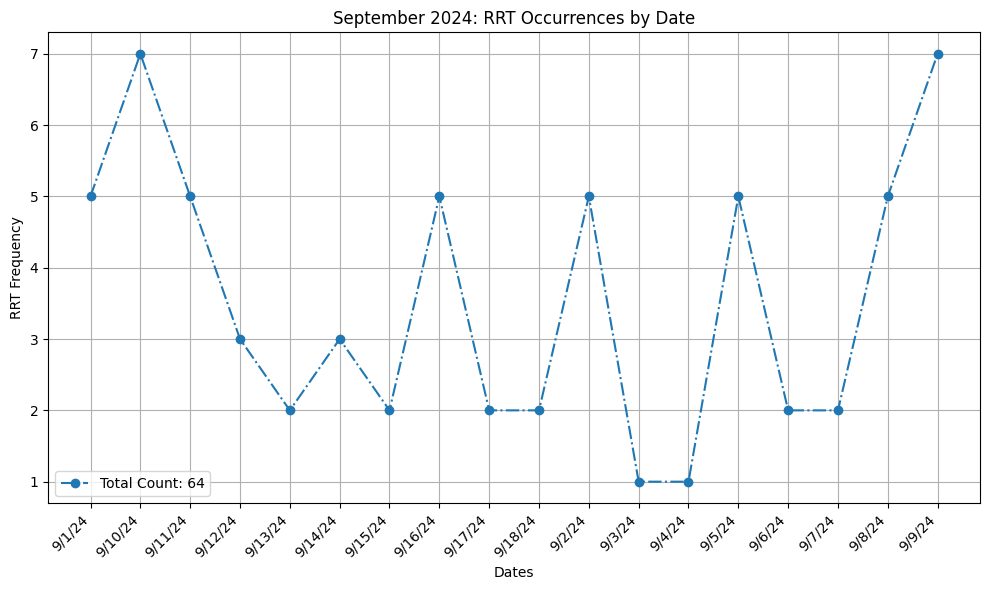

In [11]:
#Frequency of RRTs with Total

# Groupby date and RRT ONLY columns
rrt_frequency = df_cleaned.groupby([df_cleaned.columns[0], df_cleaned.columns[3]]).size().reset_index(name='Count')

# Sort by Date to ensure dates are in ascending order with total count in legend
rrt_frequency = rrt_frequency.sort_values(by=df_cleaned.columns[0], ascending=True)

# Rename columns for clarity
rrt_frequency.columns = ['Date', 'RRT Occurrences', 'Count']

# Calculate the total count
total_count = rrt_frequency['Count'].sum()

# Print the column names to verify
#print(rrt_frequency.columns)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(rrt_frequency['Date'], rrt_frequency['Count'], marker='o', linestyle='-.', label=f'Total Count: {total_count}')
plt.xlabel('Dates')
plt.ylabel('RRT Frequency')
plt.title('September 2024: RRT Occurrences by Date')
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


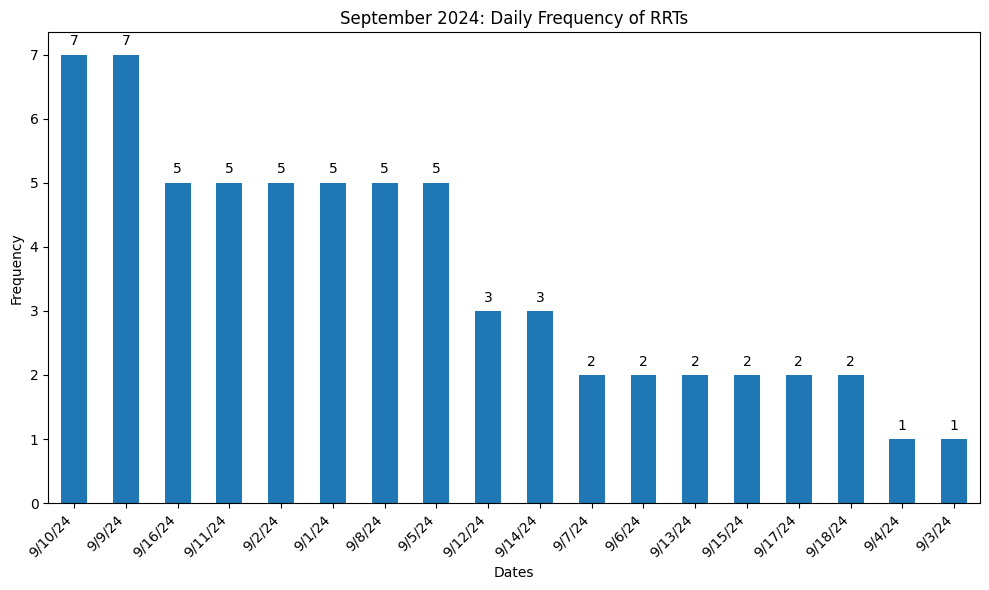

In [12]:
#Frequency of RRTs by Dates in August 2024

# Count the frequency of each date, sorting by index (date)
frequency_date = df_cleaned[0].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = frequency_date.plot(kind='bar')

#Visualization
# Set labels and title
plt.xlabel('Dates')
plt.ylabel('Frequency')
#plt.title('Frequency of RRTs by Days in August')
#plt.title('Daily Frequency of RRTs in August 2024')
plt.title('September 2024: Daily Frequency of RRTs')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add frequency numbers on top of each bar
for i, v in enumerate(frequency_date):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Add a legend
#ax.legend(['Color Vision Deficiency Palette'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


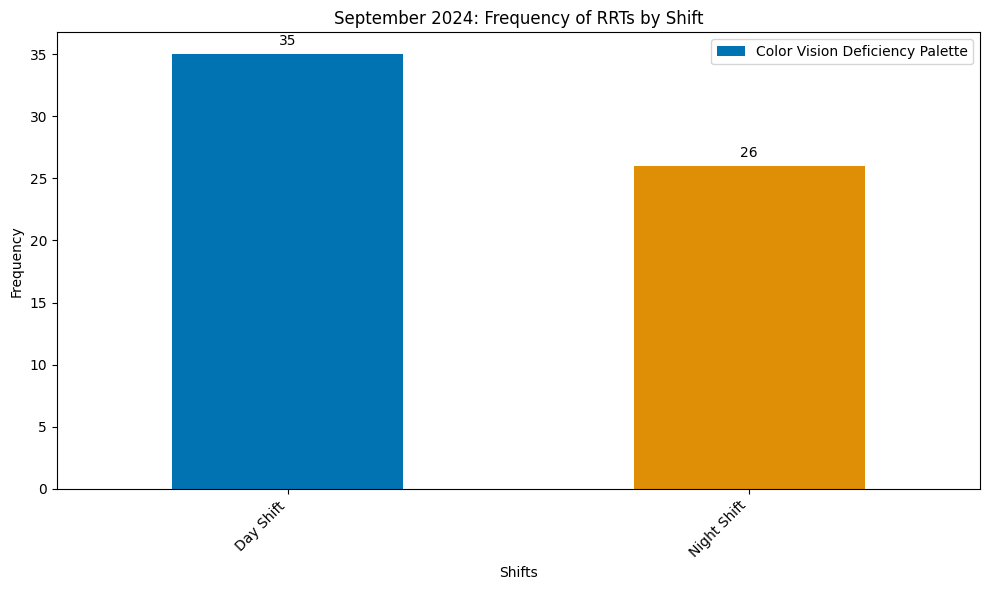

In [13]:
#Frequency of RRTs by Shift

# Convert the timestamp column to datetime
df_cleaned[1] = pd.to_datetime(df_cleaned[1], errors='coerce')

# Drop rows with NaT values if necessary
df_cleaned = df_cleaned.dropna(subset=[1])

# Define the bins and labels for the shifts
bins = [0, 7, 19, 24]
labels = ['Night Shift', 'Day Shift', 'Night Shift']

# Categorize the timestamps into shifts
df_cleaned['Shift'] = pd.cut(df_cleaned[1].dt.hour, bins=bins, labels=labels, right=False, include_lowest=True, ordered=False)

# Calculate the frequency by shift
frequency_shift = df_cleaned['Shift'].value_counts()
#print(frequency_shift)

# Define color for the bar chart
plt.style.use('seaborn-colorblind')
colors = sns.color_palette('colorblind')

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = frequency_shift.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Shifts')
plt.ylabel('Frequency')
plt.title('September 2024: Frequency of RRTs by Shift')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add frequency numbers on top of each bar with improved positioning
for i, v in enumerate(frequency_shift):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')  # Adjust vertical position

# Add a legend
ax.legend(['Color Vision Deficiency Palette'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()



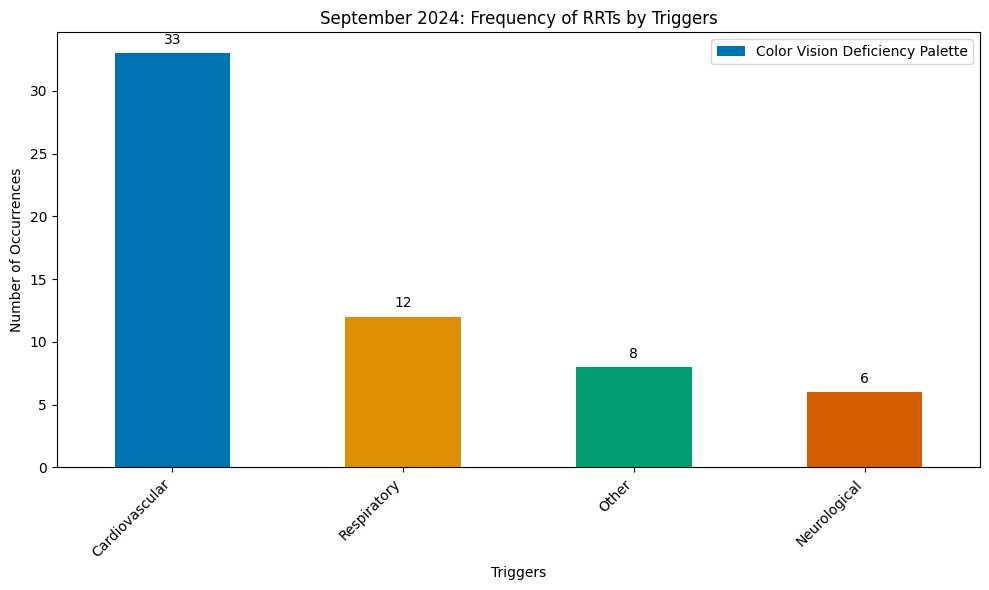

In [14]:
# Frequency of RRT by Triggers in August

frequency_triggers = df_cleaned[2].value_counts().head(5) # Get top 5 frequencies

plt.style.use('seaborn-colorblind')
colors = sns.color_palette('colorblind')


# Plot the bar chart with adjusted figure size
plt.figure(figsize=(10, 6))
ax = frequency_triggers.plot(kind='bar', color=colors)

# Set more descriptive labels and title
plt.xlabel('Triggers')
plt.ylabel('Number of Occurrences')
plt.title('September 2024: Frequency of RRTs by Triggers')

# Add frequency numbers on top of each bar with improved positioning
for i, v in enumerate(frequency_triggers):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(['Color Vision Deficiency Palette'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

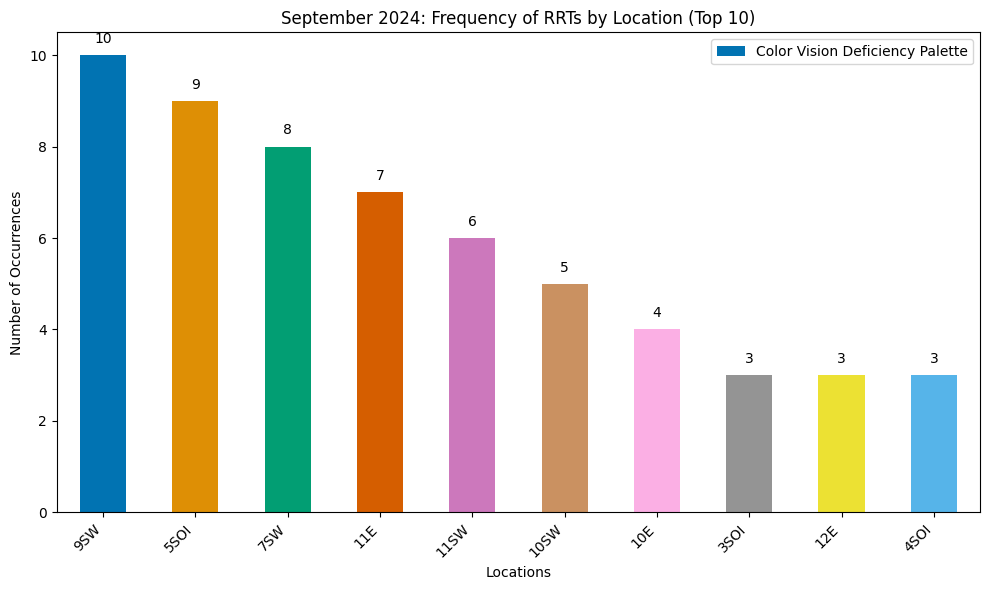

19142

In [15]:
# Frequency of RRTs by Location (Top 10)

frequency_loc = df_cleaned[4].value_counts().head(10)

plt.style.use('seaborn-colorblind')
colors = sns.color_palette('colorblind')

# Plot the bar chart with adjusted figure size
plt.figure(figsize=(10, 6))
ax=frequency_loc.plot(kind='bar', color=colors)

# Set more informative labels and title
plt.xlabel('Locations')
plt.ylabel('Number of Occurrences')
plt.title('September 2024: Frequency of RRTs by Location (Top 10)')

# Add frequency numbers on top of each bar with improved positioning
for i, v in enumerate(frequency_loc):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')  # Adjust vertical position

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(['Color Vision Deficiency Palette'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Collect garbage
gc.collect()

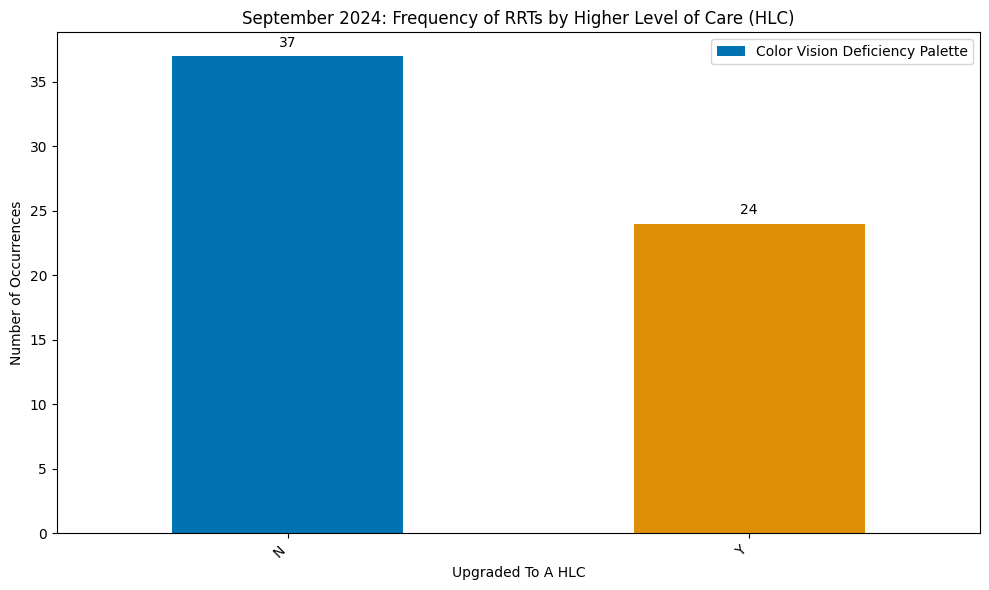

In [16]:
# Frequency of RRTs by Higher Level of Care (HLC)

frequency_hlc = df_cleaned[5].value_counts()

plt.style.use('seaborn-colorblind')
colors = sns.color_palette('colorblind')

# Plot the bar chart with adjusted figure size
plt.figure(figsize=(10, 6))
ax=frequency_hlc.plot(kind='bar', color=colors)

# Set more informative labels and title
plt.xlabel('Upgraded To A HLC')
plt.ylabel('Number of Occurrences')
plt.title('September 2024: Frequency of RRTs by Higher Level of Care (HLC)')

# Add frequency numbers on top of each bar with improved positioning
for i, v in enumerate(frequency_hlc):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')  # Adjust vertical position

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(['Color Vision Deficiency Palette'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

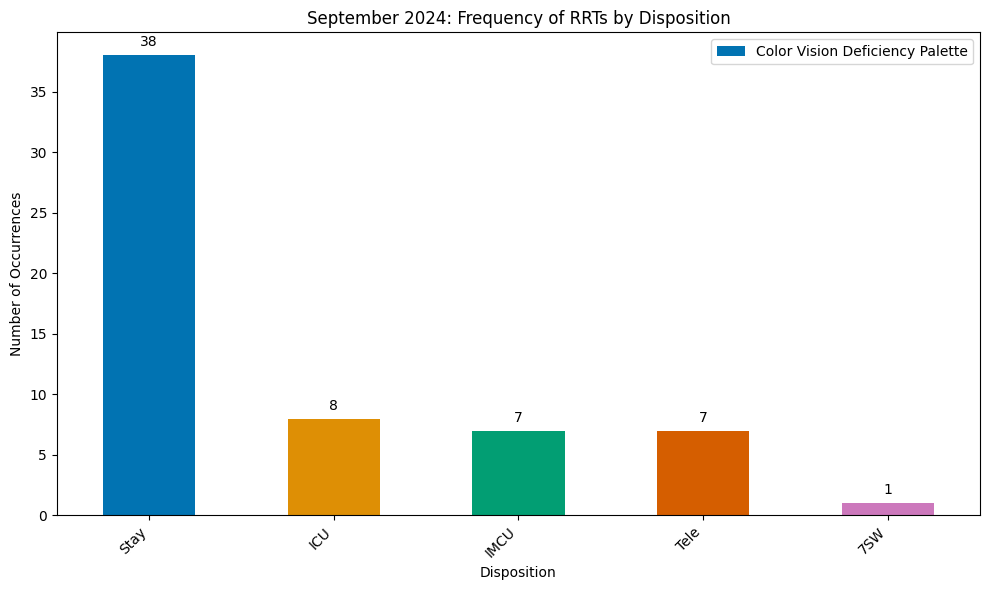

In [17]:
# Frequency of RRT by Disposition

frequency_outcome = df_cleaned[6].value_counts()

plt.style.use('seaborn-colorblind')
colors = sns.color_palette('colorblind')

# Plot the bar chart with adjusted figure size
plt.figure(figsize=(10, 6))
ax = frequency_outcome.plot(kind='bar', color=colors)

# Set more descriptive labels and title
plt.xlabel('Disposition')
plt.ylabel('Number of Occurrences')
plt.title('September 2024: Frequency of RRTs by Disposition')

# Add frequency numbers on top of each bar with improved positioning
for i, v in enumerate(frequency_outcome):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(['Color Vision Deficiency Palette'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()